# Exercises - Modeling

1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.



In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import env

np.random.seed(123)

In [2]:
sql_url = env.get_connection('iris_db')

In [3]:
query = '''
        SELECT *
        FROM measurements
        JOIN species USING(species_id);
        '''

In [4]:
iris = pd.read_sql(query, sql_url)
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


a. Choose features other than the ones used in the lesson.

 - Using sepal_width and petal_width as the features.

b. Visualize the results of your clustering.

In [5]:
seed = 123

train, val_test = train_test_split(iris, train_size=0.7, random_state=seed)

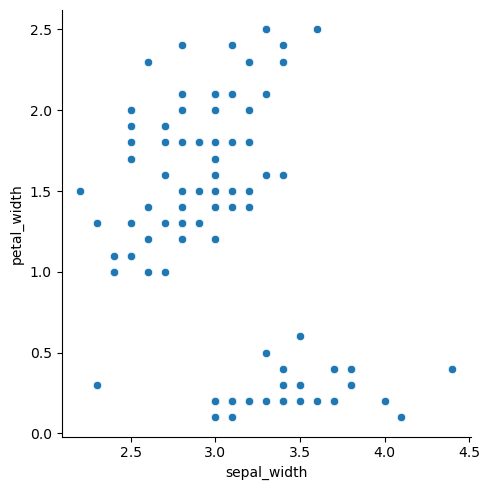

In [6]:
sns.relplot(data=train, x='sepal_width', y='petal_width')

In [7]:
X = train[['sepal_width', 'petal_width']]

In [8]:
seed = 123

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2,
       0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2], dtype=int32)

In [9]:
X['unscaled_clusters'] = kmeans.predict(X)
X.head()

,sepal_width,petal_width,unscaled_clusters
114,2.8,2.4,2
136,3.4,2.4,2
53,2.3,1.3,0
19,3.8,0.3,1
38,3.0,0.2,1


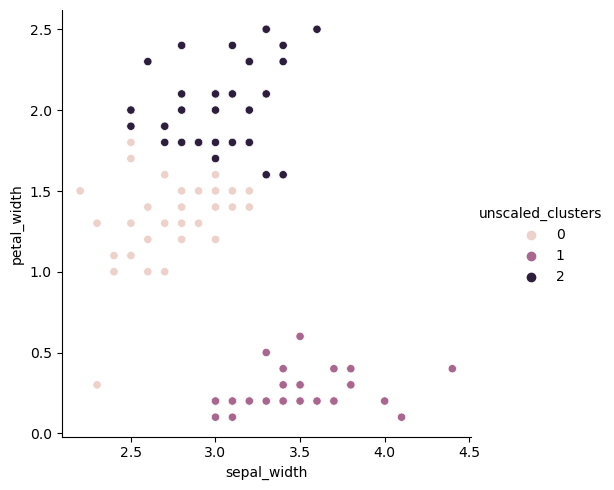

In [10]:
sns.relplot(data=X, x='sepal_width', y='petal_width', hue='unscaled_clusters')
plt.show()

In [11]:
mm_scaler = MinMaxScaler()

X[['sepal_width', 'petal_width']] = mm_scaler.fit_transform(X[['sepal_width', 'petal_width']])

X.head()

,sepal_width,petal_width,unscaled_clusters
114,0.272727,0.958333,2
136,0.545455,0.958333,2
53,0.045455,0.500000,0
19,0.727273,0.083333,1
38,0.363636,0.041667,1


In [12]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X[['sepal_width', 'petal_width']])

KMeans(n_clusters=3, random_state=123)

In [13]:
kmeans_scale.predict(X[['sepal_width', 'petal_width']])

array([2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2,
       0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2], dtype=int32)

In [14]:
X['scaled_clusters'] = kmeans_scale.predict(X[['sepal_width', 'petal_width']])

X.head()

,sepal_width,petal_width,unscaled_clusters,scaled_clusters
114,0.272727,0.958333,2,2
136,0.545455,0.958333,2,2
53,0.045455,0.500000,0,0
19,0.727273,0.083333,1,1
38,0.363636,0.041667,1,1


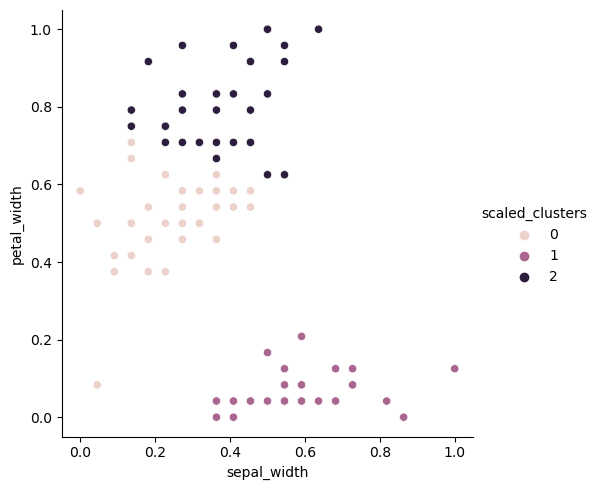

In [15]:
sns.relplot(data=X, x='sepal_width', y='petal_width', hue='scaled_clusters')
plt.show()

c. Use the elbow method to visually select a good value for k.

In [16]:
kmeans_scale.cluster_centers_

array([[0.25609756, 0.50813008],
       [0.56891496, 0.06451613],
       [0.37741047, 0.80934343]])

In [17]:
kmeans_scale.inertia_

2.77412841766189

In [18]:
inertia = []
seed = 123

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(X[['sepal_width', 'petal_width']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[13.461855841969479,
 4.579928993979332,
 2.7741284176618897,
 2.152220262660738,
 1.7057728505042553,
 1.21363410776861,
 1.0156168870354612,
 0.8703876028127064,
 0.7510937604221397,
 0.6439545294867187]

In [19]:
results_df = pd.DataFrame({'n_clusters': list(range(1, 11)), 'inertia': inertia})

results_df

,n_clusters,inertia
0,1,13.461856
1,2,4.579929
2,3,2.774128
3,4,2.152220
4,5,1.705773
5,6,1.213634
6,7,1.015617
7,8,0.870388
8,9,0.751094
9,10,0.643955


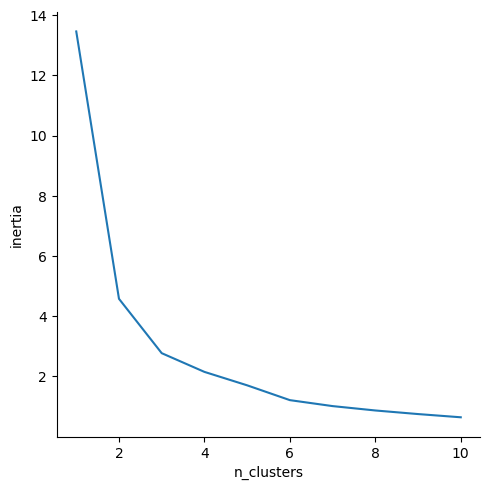

In [20]:
sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line')
plt.show()

***Takeaways***

- The best value for k appears to be 2 or 3.

d. Repeat the clustering, this time with 3 different features.

- I will use species_id, measurement_id, and petal_length

In [93]:
X = iris[['species_id', 'measurement_id']]


In [98]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [99]:
X['cluster'] = kmeans.predict(X)


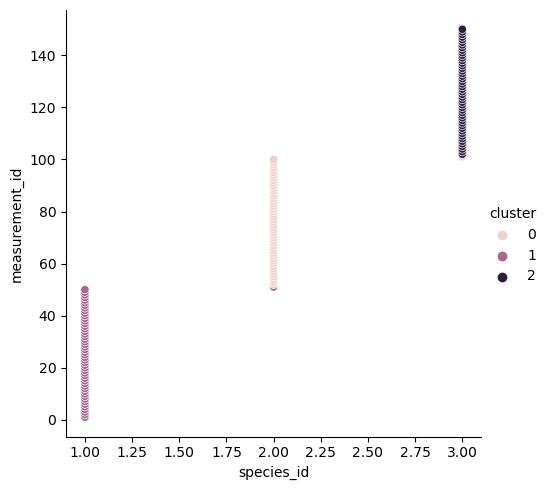

In [100]:
sns.relplot(data=X, x='species_id', y='measurement_id', hue='cluster')
plt.show()

In [101]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,species_id,measurement_id,cluster
0,2.020000,76.5,4.600000e-01
1,1.019608,26.0,1.000000e+00
2,3.000000,126.0,2.220446e-16


<Figure size 1400x900 with 0 Axes>

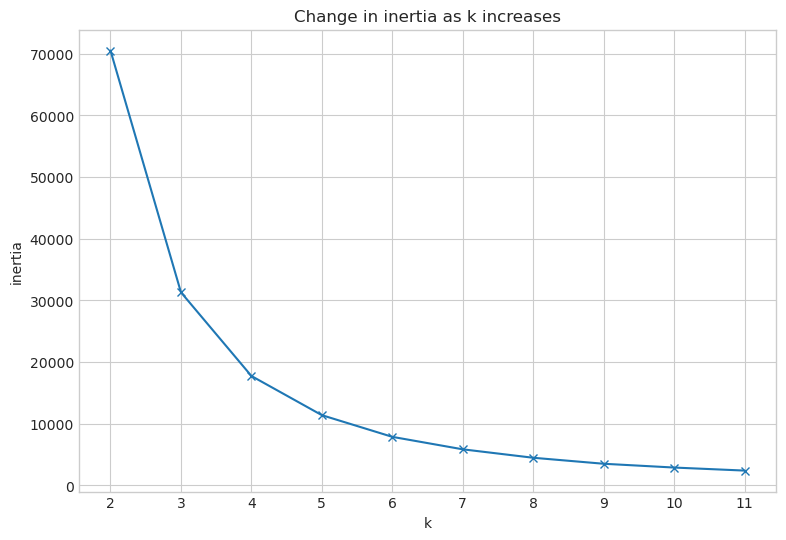

In [39]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
plt.show()

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import env
from env import host, username, password
import wrangle_mall

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from wrangle_mall import acquire_mall

In [41]:
mall=wrangle_mall.get_mall_data()



In [43]:
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
seed = 123

train, val_test = train_test_split(mall, train_size=0.7, random_state=seed)

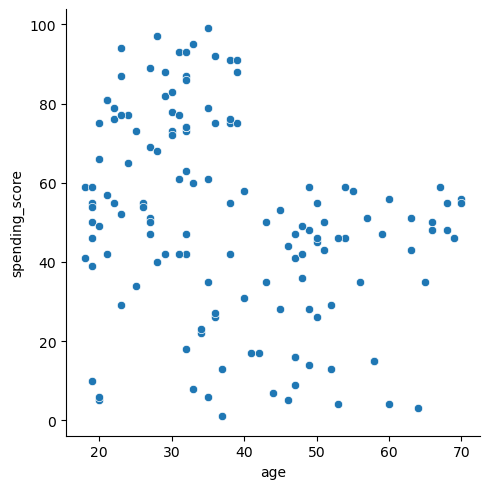

In [49]:
sns.relplot(data=train, x='age', y='spending_score')
plt.show()

In [50]:
X = train[['age', 'spending_score']]

In [51]:
seed = 123

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 0,
       2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1,
       1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2,
       1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1], dtype=int32)

In [52]:
X['unscaled_clusters'] = kmeans.predict(X)
X.head()

,age,spending_score,unscaled_clusters
81,38,55,1
107,54,46,1
112,38,42,1
145,28,97,2
8,64,3,0


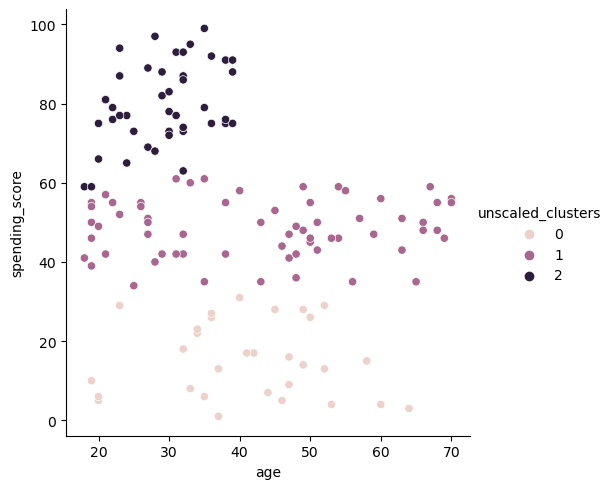

In [53]:
sns.relplot(data=X, x='age', y='spending_score', hue='unscaled_clusters')
plt.show()

In [54]:
mm_scaler = MinMaxScaler()

X[['age', 'spending_score']] = mm_scaler.fit_transform(X[['age', 'spending_score']])

X.head()

,age,spending_score,unscaled_clusters
81,0.384615,0.551020,1
107,0.692308,0.459184,1
112,0.384615,0.418367,1
145,0.192308,0.979592,2
8,0.884615,0.020408,0


In [55]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X[['age', 'spending_score']])

KMeans(n_clusters=3, random_state=123)

In [56]:
kmeans_scale.predict(X[['age', 'spending_score']])

array([0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1,
       0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0,
       1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0,
       1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [57]:
X['scaled_clusters'] = kmeans_scale.predict(X[['age', 'spending_score']])

X.head()

,age,spending_score,unscaled_clusters,scaled_clusters
81,0.384615,0.551020,1,0
107,0.692308,0.459184,1,1
112,0.384615,0.418367,1,2
145,0.192308,0.979592,2,0
8,0.884615,0.020408,0,1


In [58]:
X['scaled_clusters'] = kmeans_scale.predict(X[['age', 'spending_score']])
X.head()

,age,spending_score,unscaled_clusters,scaled_clusters
81,0.384615,0.551020,1,0
107,0.692308,0.459184,1,1
112,0.384615,0.418367,1,2
145,0.192308,0.979592,2,0
8,0.884615,0.020408,0,1


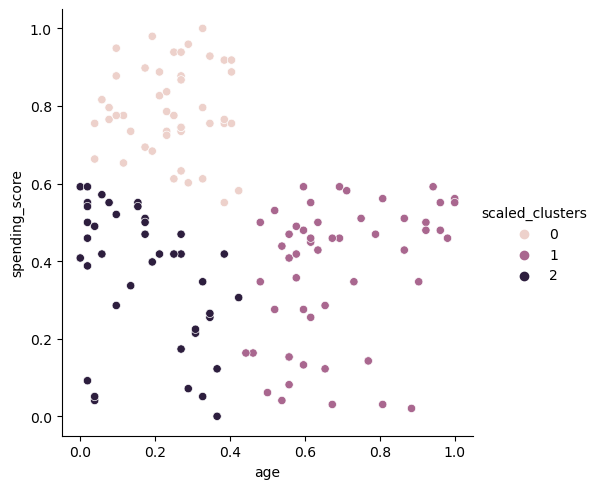

In [59]:
sns.relplot(data=X, x='age', y='spending_score', hue='scaled_clusters')
plt.show()

In [60]:
kmeans_scale.cluster_centers_

array([[0.23690671, 0.78897091],
       [0.68867925, 0.3658067 ],
       [0.17115385, 0.36326531]])

In [61]:
kmeans_scale.inertia_

6.105431506331964

In [62]:
inertia = []
seed = 123

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(X[['age', 'spending_score']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[19.470557609440345,
 9.224479694806778,
 6.105431506331963,
 4.216485561373978,
 3.382950626269669,
 2.5594371003686973,
 2.184212721121882,
 1.9147649825797441,
 1.6240984716516986,
 1.4638573574590281]

In [63]:
results_df = pd.DataFrame({'n_clusters': list(range(1, 11)), 'inertia': inertia})

results_df

,n_clusters,inertia
0,1,19.470558
1,2,9.224480
2,3,6.105432
3,4,4.216486
4,5,3.382951
5,6,2.559437
6,7,2.184213
7,8,1.914765
8,9,1.624098
9,10,1.463857


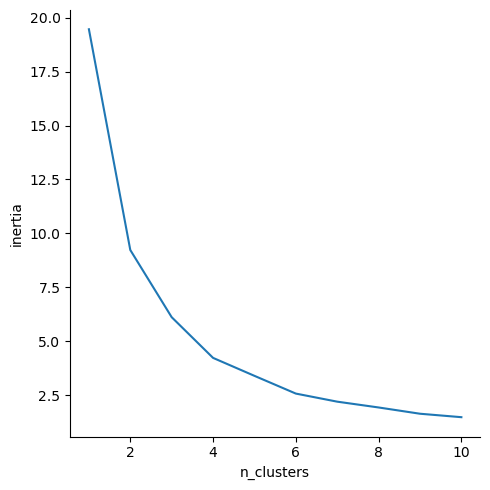

In [64]:
sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line')
plt.show()

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [69]:
sql_url = env.get_connection('albums_db')

In [70]:
query = '''
        SELECT *
        FROM albums;
        '''

In [71]:
albums = pd.read_sql(query, sql_url)
albums.head()

,id,artist,name,release_date,sales,genre
0,1,Michael Jackson,Thriller,1982,47.3,"Pop, Rock, R&B"
1,2,AC/DC,Back in Black,1980,26.1,Hard rock
2,3,Pink Floyd,The Dark Side of the Moon,1973,24.2,Progressive rock
3,4,Meat Loaf,Bat Out of Hell,1977,21.5,"Hard rock, Progressive rock"
4,5,Whitney Houston / Various artists,The Bodyguard,1992,28.4,"R&B, Soul, Pop, Soundtrack"


In [72]:
seed = 123

train, val_test = train_test_split(albums, train_size=0.7, random_state=seed)

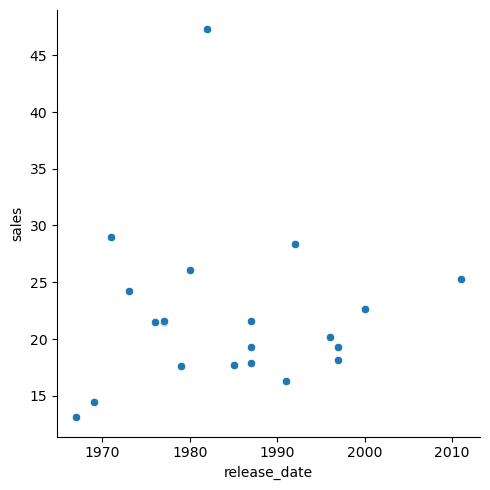

In [77]:
sns.relplot(data=train, x='release_date', y='sales')
plt.show()

In [78]:
X = train[['release_date', 'sales']]

In [79]:
seed = 123

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int32)

In [80]:
X['unscaled_clusters'] = kmeans.predict(X)
X.head()

,release_date,sales,unscaled_clusters
18,1997,19.3,0
4,1992,28.4,0
3,1977,21.5,1
24,1985,17.7,0
16,1987,17.9,0


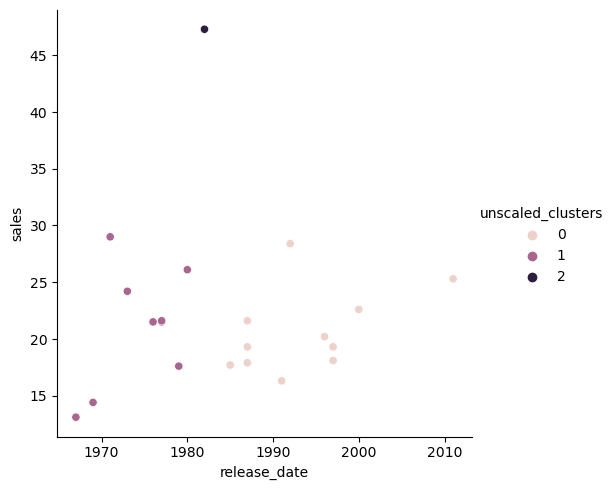

In [81]:
sns.relplot(data=X, x='release_date', y='sales', hue='unscaled_clusters')
plt.show()

In [82]:
mm_scaler = MinMaxScaler()

X[['release_date', 'sales']] = mm_scaler.fit_transform(X[['release_date', 'sales']])

X.head()

,release_date,sales,unscaled_clusters
18,0.681818,0.181287,0
4,0.568182,0.447368,0
3,0.227273,0.245614,1
24,0.409091,0.134503,0
16,0.454545,0.140351,0


In [83]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X[['release_date', 'sales']])

KMeans(n_clusters=3, random_state=123)

In [84]:
kmeans_scale.predict(X[['release_date', 'sales']])

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int32)

In [85]:
X['scaled_clusters'] = kmeans_scale.predict(X[['release_date', 'sales']])

X.head()

,release_date,sales,unscaled_clusters,scaled_clusters
18,0.681818,0.181287,0,0
4,0.568182,0.447368,0,0
3,0.227273,0.245614,1,1
24,0.409091,0.134503,0,0
16,0.454545,0.140351,0,0


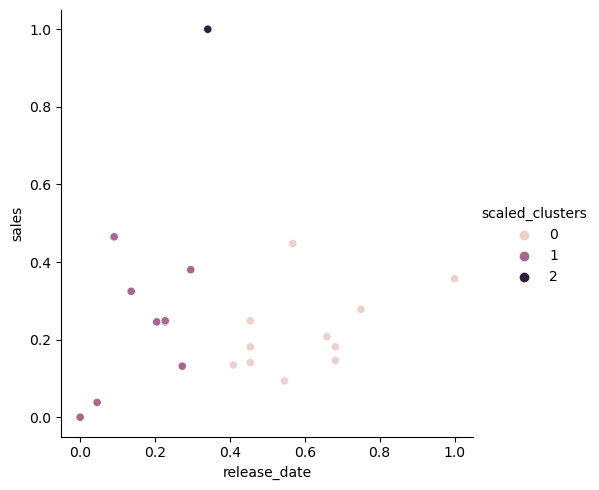

In [86]:
sns.relplot(data=X, x='release_date', y='sales', hue='scaled_clusters')
plt.show()

In [87]:
kmeans_scale.cluster_centers_

array([[0.6053719 , 0.21956406],
       [0.16666667, 0.23099415],
       [0.34090909, 1.        ]])

In [88]:
kmeans_scale.inertia_

0.6884183202157019

In [89]:
inertia = []
seed = 123

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(X[['release_date', 'sales']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[2.2184898874894436,
 1.2479756951486127,
 0.6884183202157019,
 0.47136299820254746,
 0.2987779556715083,
 0.19789390119141909,
 0.13770572363251177,
 0.09045974613176931,
 0.06263504102130896,
 0.048808755275692076]

In [90]:
results_df = pd.DataFrame({'n_clusters': list(range(1, 11)), 'inertia': inertia})

results_df

,n_clusters,inertia
0,1,2.218490
1,2,1.247976
2,3,0.688418
3,4,0.471363
4,5,0.298778
5,6,0.197894
6,7,0.137706
7,8,0.090460
8,9,0.062635
9,10,0.048809


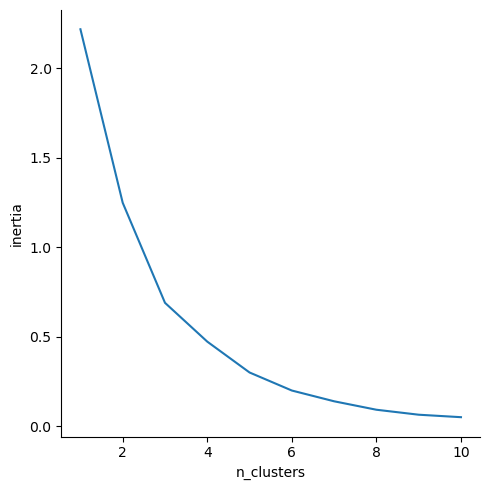

In [91]:
sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line')
plt.show()